In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Your Neural Network and ActivationFunctions classes here...
from MyNeuralNetwork import MyNeuralNetwork

def plot_scatter(y_test, predictions, structure, epochs, lr, momentum, activation):
    # Plot scatter plot for real vs predicted values
    fig, ax = plt.subplots()
    ax.scatter(y_test, predictions)
    ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes, color='gray')  # Diagonal line for reference
    ax.set_title(f"Structure: {structure}, Epochs: {epochs}, LR: {lr}, Momentum: {momentum}, Activation: {activation}")
    ax.set_xlabel("Real Values")
    ax.set_ylabel("Predicted Values")
    plt.show()

def plot_errors(nn, predictions, structure, epochs, lr, momentum, activation):
    # Plot the evolution of training and validation errors
    error_train, error_val = nn.loss_epochs()
    epochs_range = range(1, len(error_train) + 1)

    plt.plot(epochs_range, error_train, label='Training Error')
    plt.plot(epochs_range, error_val, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Training and Validation Error Evolution')
    plt.legend()
    plt.show()

def run_neural_network(x_train, x_test, y_train, y_test):
    # Define hyperparameter combinations to try
    layer_structures = [(4, 8, 1), (4, 4, 1)]
    epochs_values = [500, 1000]
    learning_rates = [0.01]
    momentum_values = [0.1]
    activation_functions = ["sigmoid"]

    # Initialize variables to store results
    min_mape = float('inf')
    best_params = None
    all_results = []

    # Iterate over hyperparameter combinations
    for structure, epochs, lr, momentum, activation in product(layer_structures, epochs_values, learning_rates, momentum_values, activation_functions):
        # Ensure the last layer has only one neuron
        structure = list(structure[:-1]) + [1]

        # Initialize and train the neural network
        nn = MyNeuralNetwork(layers=structure, epochs=epochs, lr=lr, momentum=momentum, fact=activation, valid=0.5)
        nn.fit(x_train, y_train)

        # Evaluate on the test set
        predictions = nn.predict(x_test)
        # predictions = predictions * 0.8 + 0.1  # Denormalize predictions
        mape = mean_absolute_percentage_error(y_test, predictions)

        # Record results
        all_results.append({
            'Structure': structure,
            'Epochs': epochs,
            'Learning Rate': lr,
            'Momentum': momentum,
            'Activation': activation,
            'MAPE': mape
        })

        # Check if current model has the minimum MAPE
        if mape < min_mape:
            min_mape = mape
            best_params = {
                'Structure': structure,
                'Epochs': epochs,
                'Learning Rate': lr,
                'Momentum': momentum,
                'Activation': activation,
                'MAPE': mape
            }

        # Plot scatter plot for real vs predicted values
        plot_scatter(y_test, predictions, structure, epochs, lr, momentum, activation)

        # Plot error evolution
        plot_errors(nn, predictions, structure, epochs, lr, momentum, activation)

    # Print the best hyperparameters
    print("All Results:")
    print(pd.DataFrame(all_results))
    print("Best Hyperparameters:")
    print(pd.DataFrame(best_params))

# Call the function with your data
# run_neural_network(x_train, x_test, y_train, y_test)


# Dataset 1

Training - epoch:  0 Error:  16.25307350653528
Validation - epoch:  0 Error:  16.69550230411353
Training - epoch:  1 Error:  9.565248247478314
Validation - epoch:  1 Error:  9.860986431387117
Training - epoch:  2 Error:  5.37965776142601
Validation - epoch:  2 Error:  5.555969119767316
Training - epoch:  3 Error:  3.7731090078562413
Validation - epoch:  3 Error:  3.8731207286193783
Training - epoch:  4 Error:  3.2708307999767205
Validation - epoch:  4 Error:  3.3271728600222277
Training - epoch:  5 Error:  3.1174973589908808
Validation - epoch:  5 Error:  3.149471604781533
Training - epoch:  6 Error:  3.0676044275504735
Validation - epoch:  6 Error:  3.085927765632122
Training - epoch:  7 Error:  3.0482148345235704
Validation - epoch:  7 Error:  3.058801544200765
Training - epoch:  8 Error:  3.037731912289368
Validation - epoch:  8 Error:  3.0438667352580078
Training - epoch:  9 Error:  3.029747198297993
Validation - epoch:  9 Error:  3.0332667519744914
Training - epoch:  10 Error:  3.

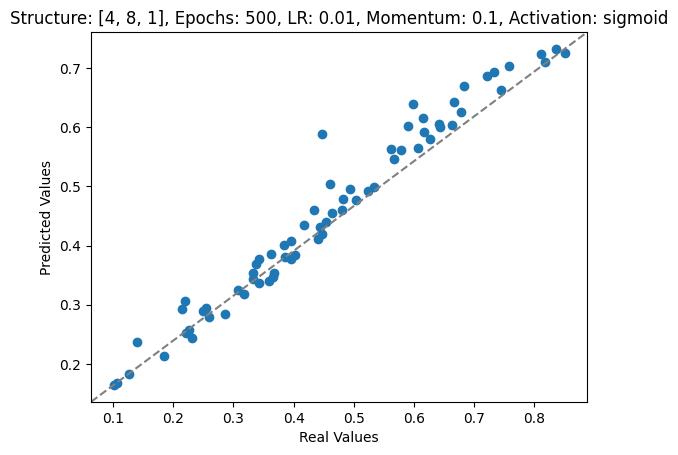

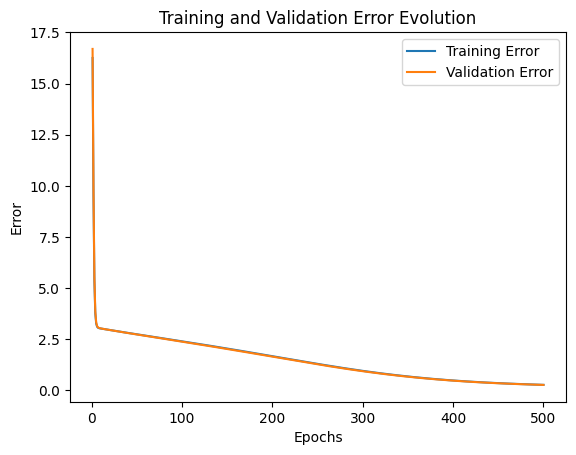

Training - epoch:  0 Error:  15.523834996103314
Validation - epoch:  0 Error:  15.253288703278097
Training - epoch:  1 Error:  10.090958691400031
Validation - epoch:  1 Error:  9.754362223257877
Training - epoch:  2 Error:  6.4376604202607925
Validation - epoch:  2 Error:  6.061131358221129
Training - epoch:  3 Error:  4.681860276761832
Validation - epoch:  3 Error:  4.273795418816551
Training - epoch:  4 Error:  3.965136242520629
Validation - epoch:  4 Error:  3.531776997801897
Training - epoch:  5 Error:  3.6831005694059664
Validation - epoch:  5 Error:  3.231465388731866
Training - epoch:  6 Error:  3.5690247239894215
Validation - epoch:  6 Error:  3.1051202873782664
Training - epoch:  7 Error:  3.5191791735983213
Validation - epoch:  7 Error:  3.0474046872224716
Training - epoch:  8 Error:  3.494054196679957
Validation - epoch:  8 Error:  3.017413240712317
Training - epoch:  9 Error:  3.4784913199909013
Validation - epoch:  9 Error:  2.9989690167510346
Training - epoch:  10 Error: 

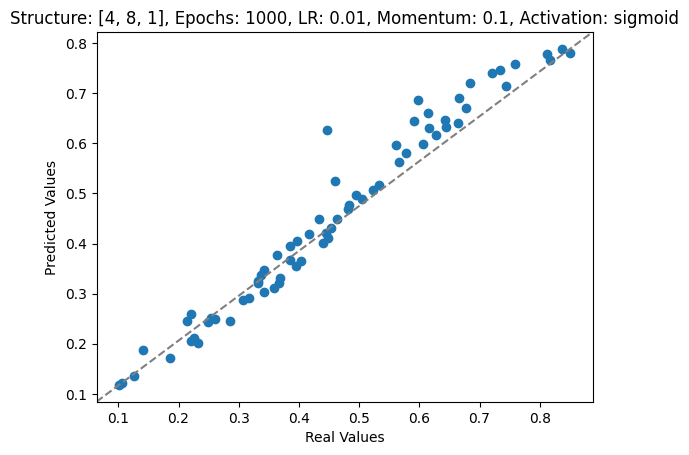

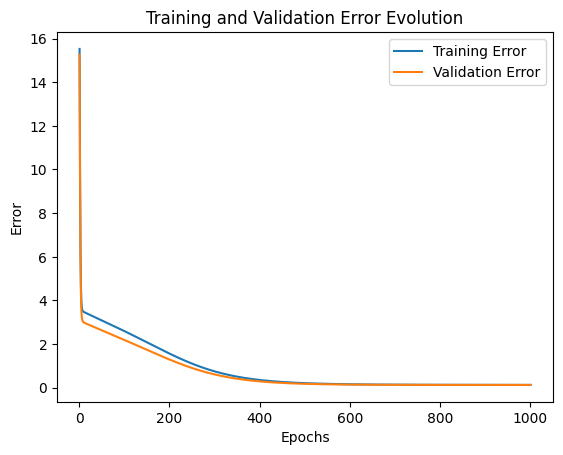

Training - epoch:  0 Error:  6.397470178527783
Validation - epoch:  0 Error:  7.003992964978042
Training - epoch:  1 Error:  4.735129946369317
Validation - epoch:  1 Error:  5.231617629440509
Training - epoch:  2 Error:  3.8505552932916274
Validation - epoch:  2 Error:  4.267582657559505
Training - epoch:  3 Error:  3.400638478848519
Validation - epoch:  3 Error:  3.7619479021869426
Training - epoch:  4 Error:  3.1731634280441288
Validation - epoch:  4 Error:  3.49560830703638
Training - epoch:  5 Error:  3.0562096759405164
Validation - epoch:  5 Error:  3.3513949236816654
Training - epoch:  6 Error:  2.993943129707051
Validation - epoch:  6 Error:  3.2698239224266445
Training - epoch:  7 Error:  2.958879741785548
Validation - epoch:  7 Error:  3.220938069120654
Training - epoch:  8 Error:  2.937452622213447
Validation - epoch:  8 Error:  3.189495975523153
Training - epoch:  9 Error:  2.9229114224609556
Validation - epoch:  9 Error:  3.1676045004557256
Training - epoch:  10 Error:  2.9

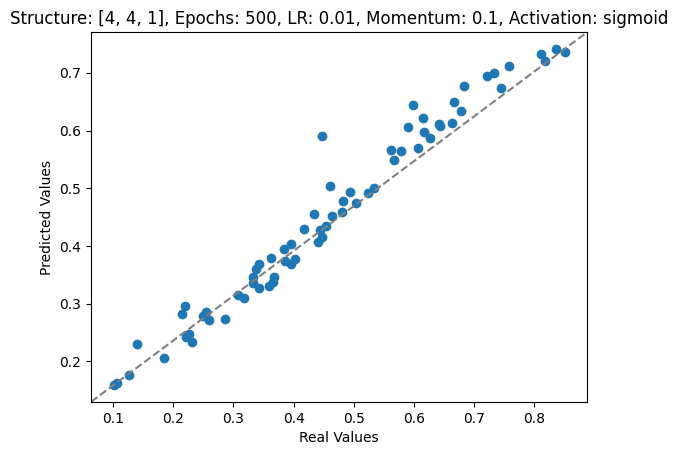

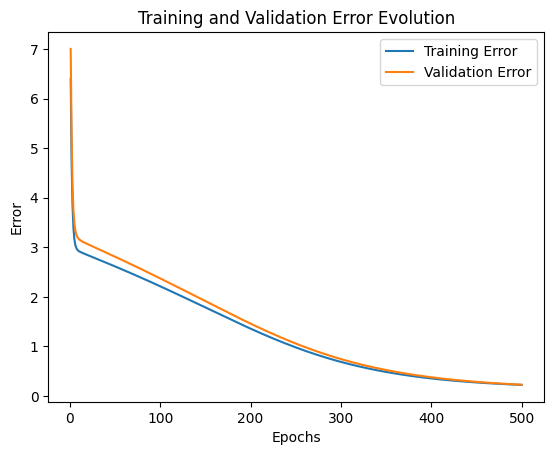

Training - epoch:  0 Error:  7.397336339183366
Validation - epoch:  0 Error:  7.988469540209867
Training - epoch:  1 Error:  5.638265288537594
Validation - epoch:  1 Error:  6.175879339268341
Training - epoch:  2 Error:  4.620677071142613
Validation - epoch:  2 Error:  5.117403129265929
Training - epoch:  3 Error:  4.061666322852974
Validation - epoch:  3 Error:  4.528091727001222
Training - epoch:  4 Error:  3.7592308915917108
Validation - epoch:  4 Error:  4.203458226386696
Training - epoch:  5 Error:  3.594648475707797
Validation - epoch:  5 Error:  4.022630236784258
Training - epoch:  6 Error:  3.503310831373834
Validation - epoch:  6 Error:  3.9193545203710736
Training - epoch:  7 Error:  3.450960504449605
Validation - epoch:  7 Error:  3.8581745077175804
Training - epoch:  8 Error:  3.4195036507168224
Validation - epoch:  8 Error:  3.820136484691578
Training - epoch:  9 Error:  3.399335657382396
Validation - epoch:  9 Error:  3.795020658756743
Training - epoch:  10 Error:  3.3853

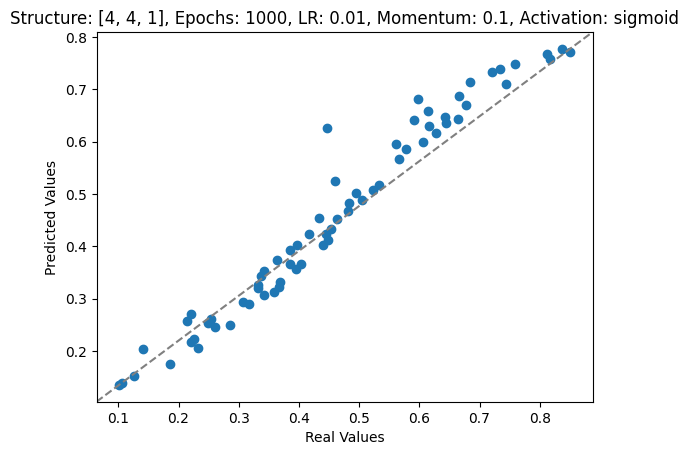

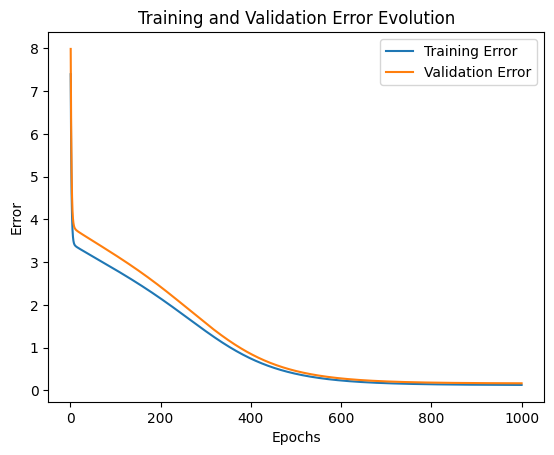

All Results:
   Structure  Epochs  Learning Rate  Momentum Activation      MAPE
0  [4, 8, 1]     500           0.01       0.1    sigmoid  0.105615
1  [4, 8, 1]    1000           0.01       0.1    sigmoid  0.067119
2  [4, 4, 1]     500           0.01       0.1    sigmoid  0.095456
3  [4, 4, 1]    1000           0.01       0.1    sigmoid  0.074917
Best Hyperparameters:
   Structure  Epochs  Learning Rate  Momentum Activation      MAPE
0          4    1000           0.01       0.1    sigmoid  0.067119
1          8    1000           0.01       0.1    sigmoid  0.067119
2          1    1000           0.01       0.1    sigmoid  0.067119


In [8]:
# Import txt file
df1 = pd.read_csv('A1-turbine.txt', sep="\t", decimal=".")

# Separate features (x1) and target variable (y1)
x1, y1 = df1.drop(["power"], axis=1), df1[["power"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1)
y1 = scaler.fit_transform(y1)
y1 = y1 * 0.8 + 0.1  # Transform y1 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, random_state=42)

# Call the run_neural_network function
run_neural_network(x1_train, x1_test, y1_train, y1_test)

# Dataset 2

In [7]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.txt', sep="\t", decimal=".")

# Rename the column '#v1' to 'v1'
df2.rename(columns={'#v1': 'v1'}, inplace=True)

# Separate features (x2) and target variable (y2)
x2, y2 = df2.drop(["z"], axis=1), df2[["z"]]

# Scale the features and target variable to the range [0, 1]
x2 = scaler.fit_transform(x2)
y2 = scaler.fit_transform(y2)
y2 = y2 * 0.8 + 0.1  # Transform y2 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Call the run_neural_network function
run_neural_network(x2_train, x2_test, y2_train, y2_test)

ValueError: shapes (8,4) and (9,) not aligned: 4 (dim 1) != 9 (dim 0)

# Dataset 3

In [ ]:
# Read data from CSV file
df3 = pd.read_csv('data.csv', sep=",", decimal=".")

# Calculate z-scores for the 'price' column and filter out values with z-scores greater than 0.8 for data normalization
from scipy.stats import zscore
z_scores = zscore(df3["price"])
abs_z_scores = np.abs(z_scores)
df3 = df3[(abs_z_scores < 0.8)]

# Drop redundant columns from the DataFrame
df3 = df3.drop(["date", "waterfront", "view", "yr_built", "yr_renovated", "street", "statezip", "country"], axis=1)

# Check for missing values in the DataFrame (There are no missing values)
missing_values = df3.isnull().sum()

# Perform one-hot encoding for the 'city' column to get rid of categorical data
df3 = pd.get_dummies(df3, columns=['city'])
# Convert boolean values to integers (1 for True, 0 for False)
df3 = df3.astype(int)

# Separate features (x3) and target variable (y3)
x3, y3 = df3.drop(["price"], axis=1), df3[["price"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x3 = scaler.fit_transform(x3)
y3 = scaler.fit_transform(y3)
y3 = y3 * 0.8 + 0.1  # Transform y3 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Call the run_neural_network function
run_neural_network(x3_train, x3_test, y3_train, y3_test)